In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)

In [3]:
bank_df = pd.read_csv('bank.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<h3>Data Preprocessing</h3>

In [4]:
# checnk number of unique values
bank_df.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [5]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<h3>EDA</h3>

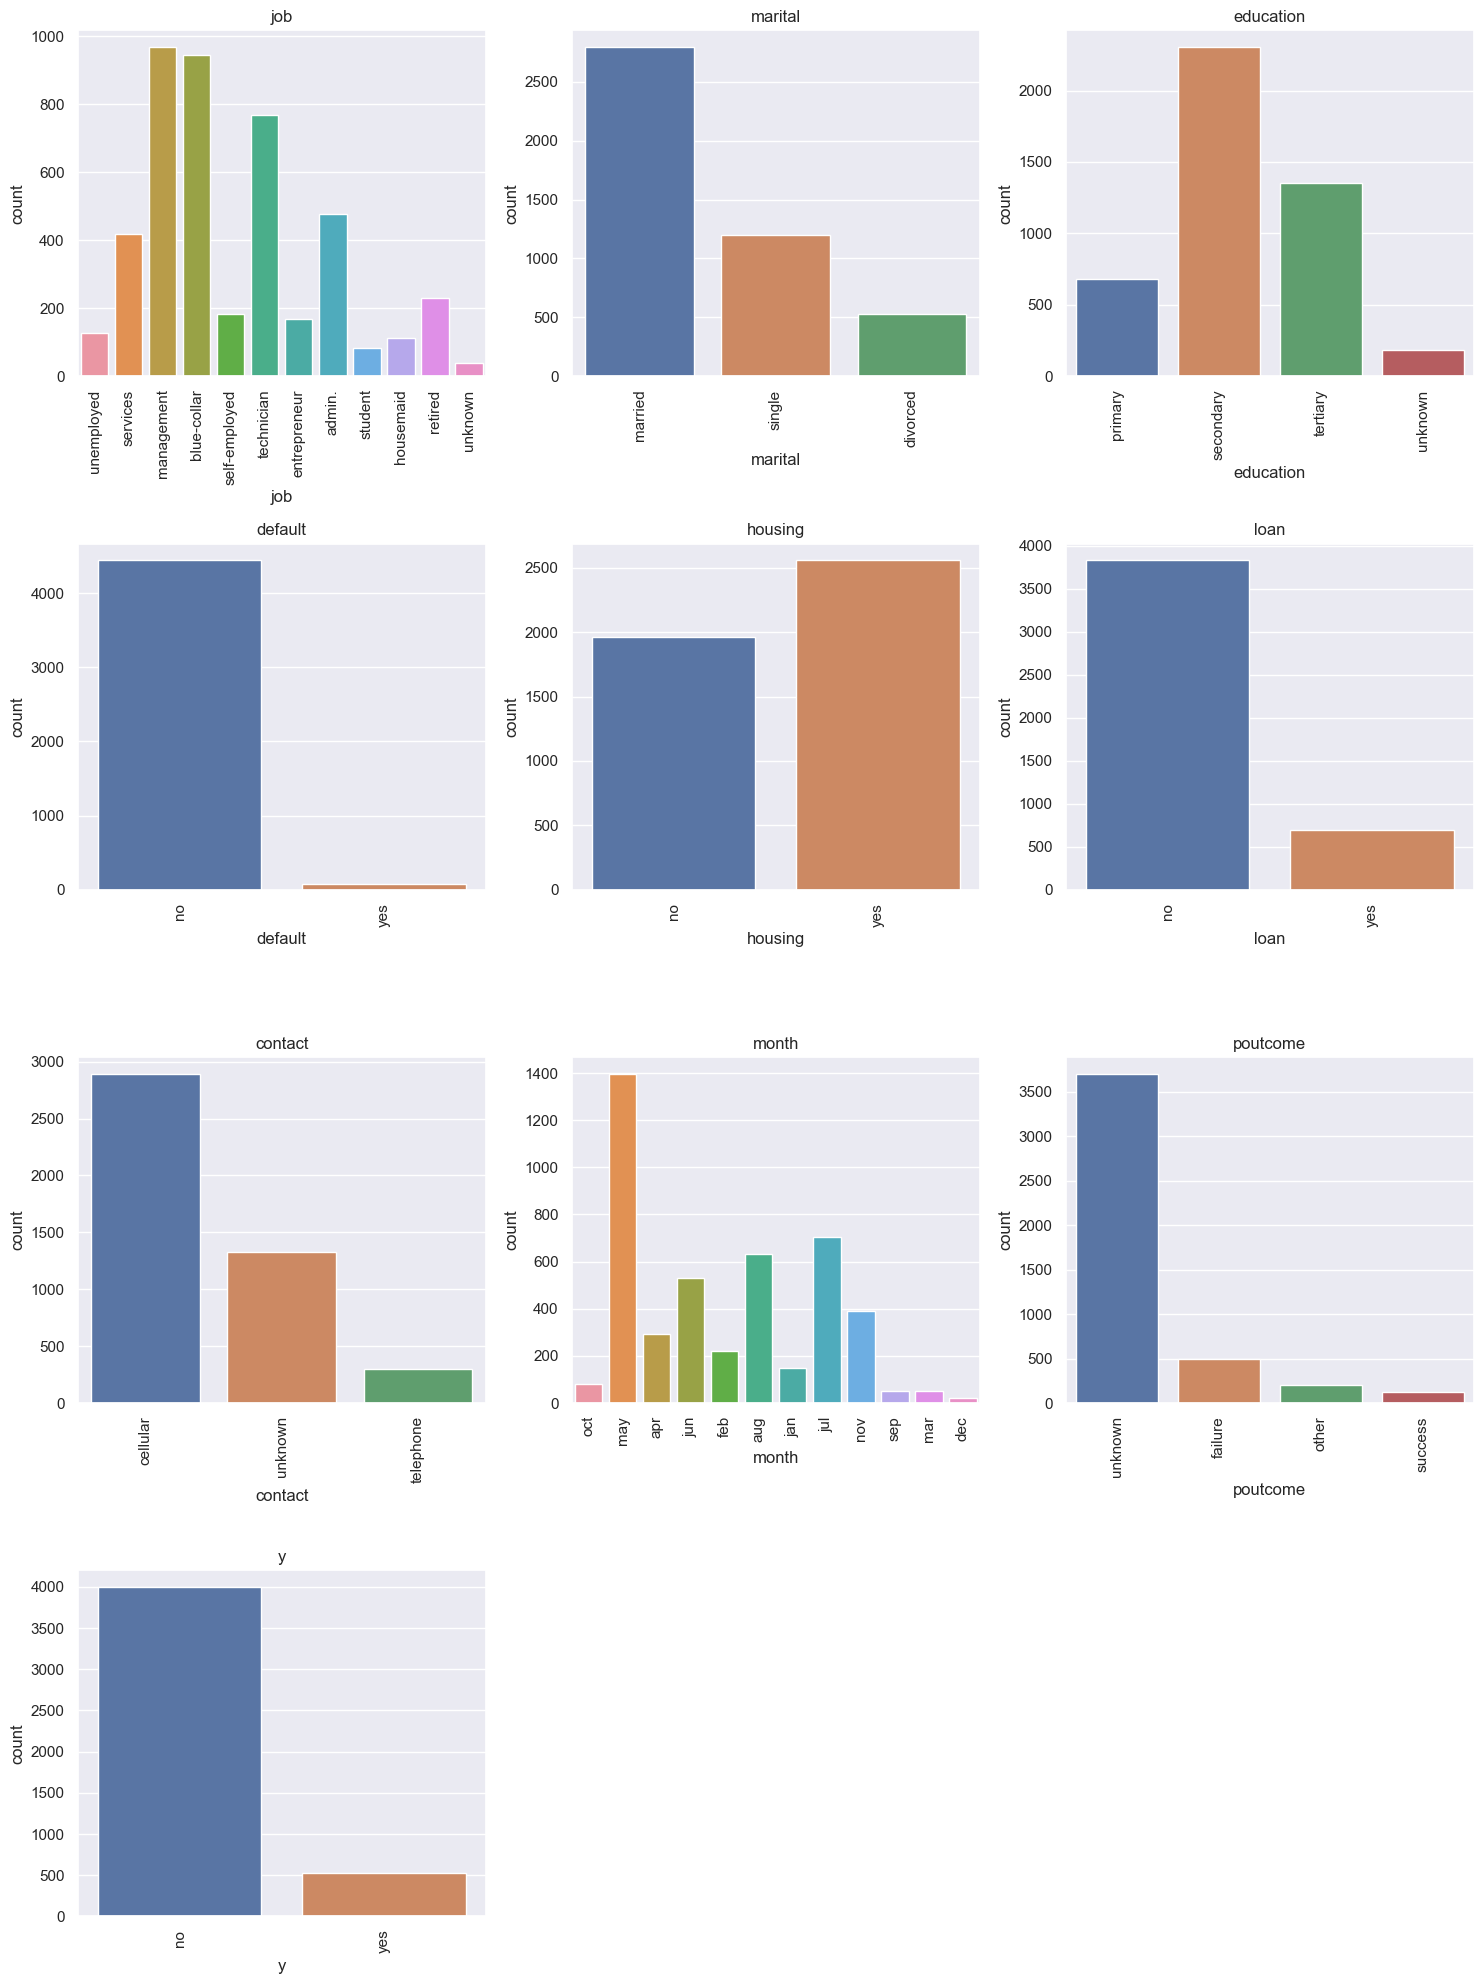

In [9]:
# get all column names categorically
category_vars = bank_df.select_dtypes(include='object').columns.tolist()

# create subplot figures
num_cols = len(category_vars)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# create countplot for each category
for i, var in enumerate(category_vars):
    sns.countplot(x=var, data=bank_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90) # rotate x-axis labels for readability
    
# remove any extra empty between subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# adjust spacing between subplots
fig.tight_layout()

plt.show()

<h3>Observations</h3>

* Job - Highest number of users have management and blue collar jobs.
* Marital Satus - Majority are married.
* House - More than 50% of the users own a house.

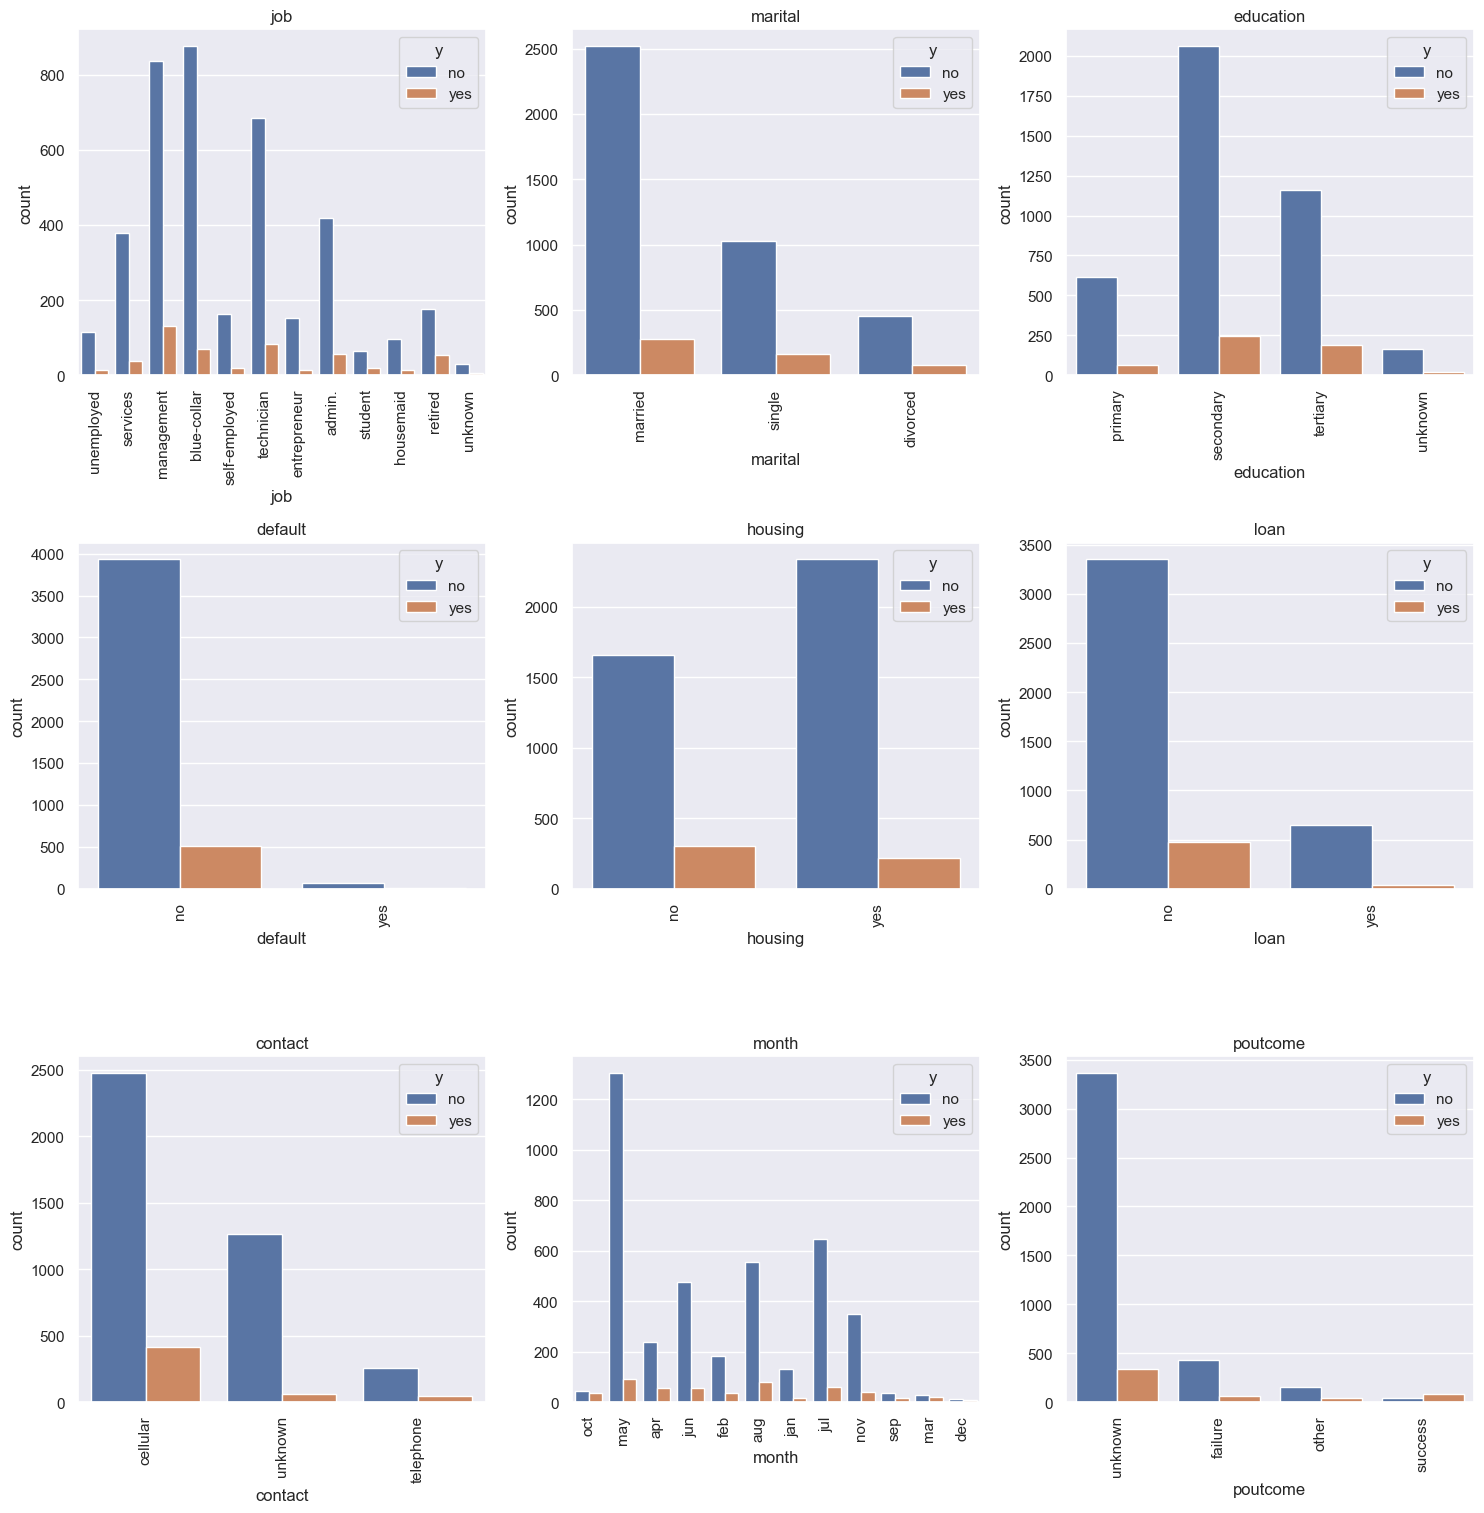

In [10]:
# visulaization 2

# get all column names categorically
category_vars = bank_df.select_dtypes(include='object').columns.tolist()

# create subplot figures
num_cols = len(category_vars)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# create countplot for each category
for i, var in enumerate(category_vars):
    sns.countplot(x=var, hue='y', data=bank_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90) # rotate x-axis labels for readability
    
# remove any extra empty between subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# adjust spacing between subplots
fig.tight_layout()

# remove last subplot
fig.delaxes(axs[9])

plt.show()

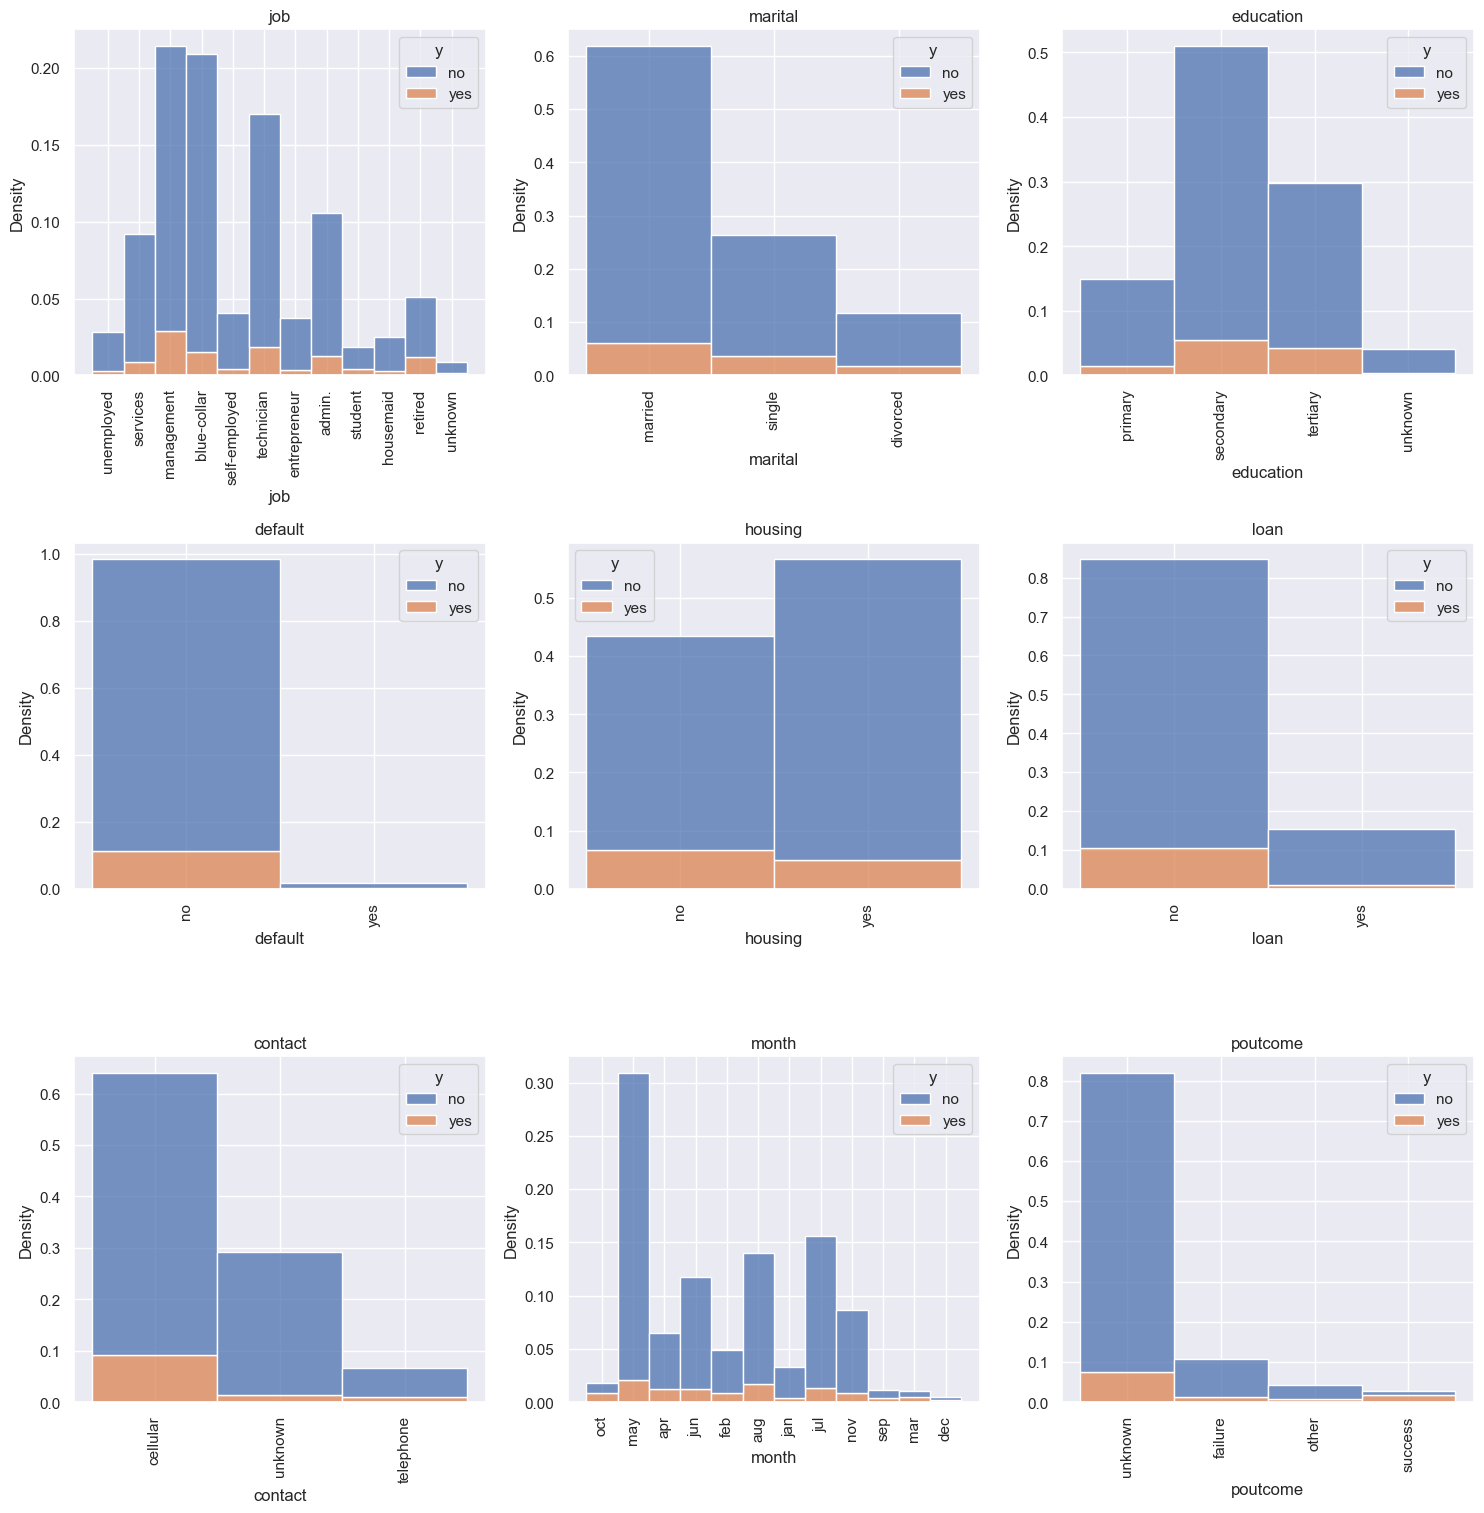

In [12]:
# visualization 3

# get all column names categorically
category_vars = bank_df.select_dtypes(include='object').columns.tolist()

# create subplot figures
num_cols = len(category_vars)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# create countplot for each category - by hist plot
for i, var in enumerate(category_vars):
    sns.histplot(x=var, hue='y', stat = 'density', multiple='stack', data=bank_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90) # rotate x-axis labels for readability
    
# remove any extra empty between subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# adjust spacing between subplots
fig.tight_layout()

# remove last subplot
fig.delaxes(axs[9])

plt.show()

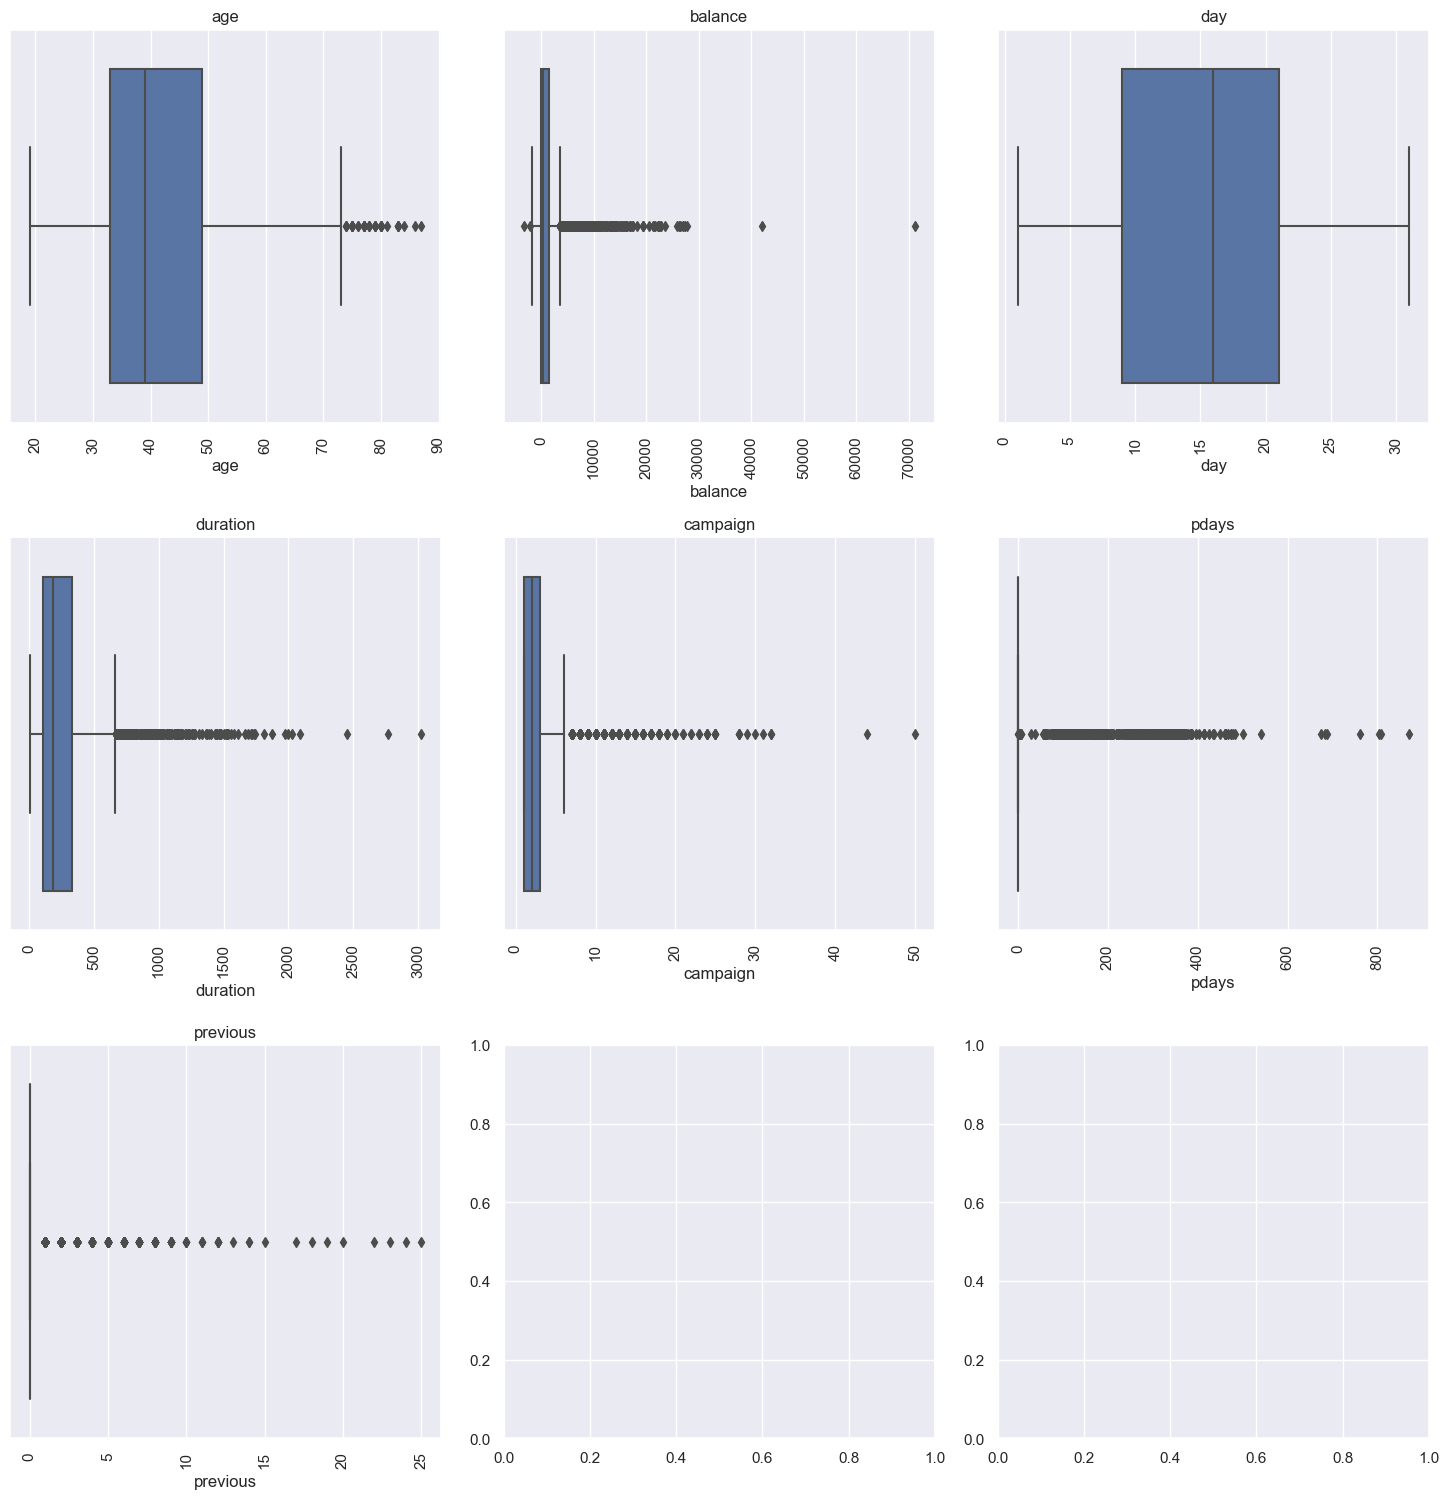

In [14]:
# visualization 4

# get all column names categorically - type int
int_vars = bank_df.select_dtypes(include='int').columns.tolist()

# create subplot figures
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# create countplot for each category
for i, var in enumerate(int_vars):
    sns.boxplot(x=bank_df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90) # rotate x-axis labels for readability
    
# remove any extra empty between subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# adjust spacing between subplots
fig.tight_layout()

# remove last subplot
fig.delaxes(axs[9])

plt.show()

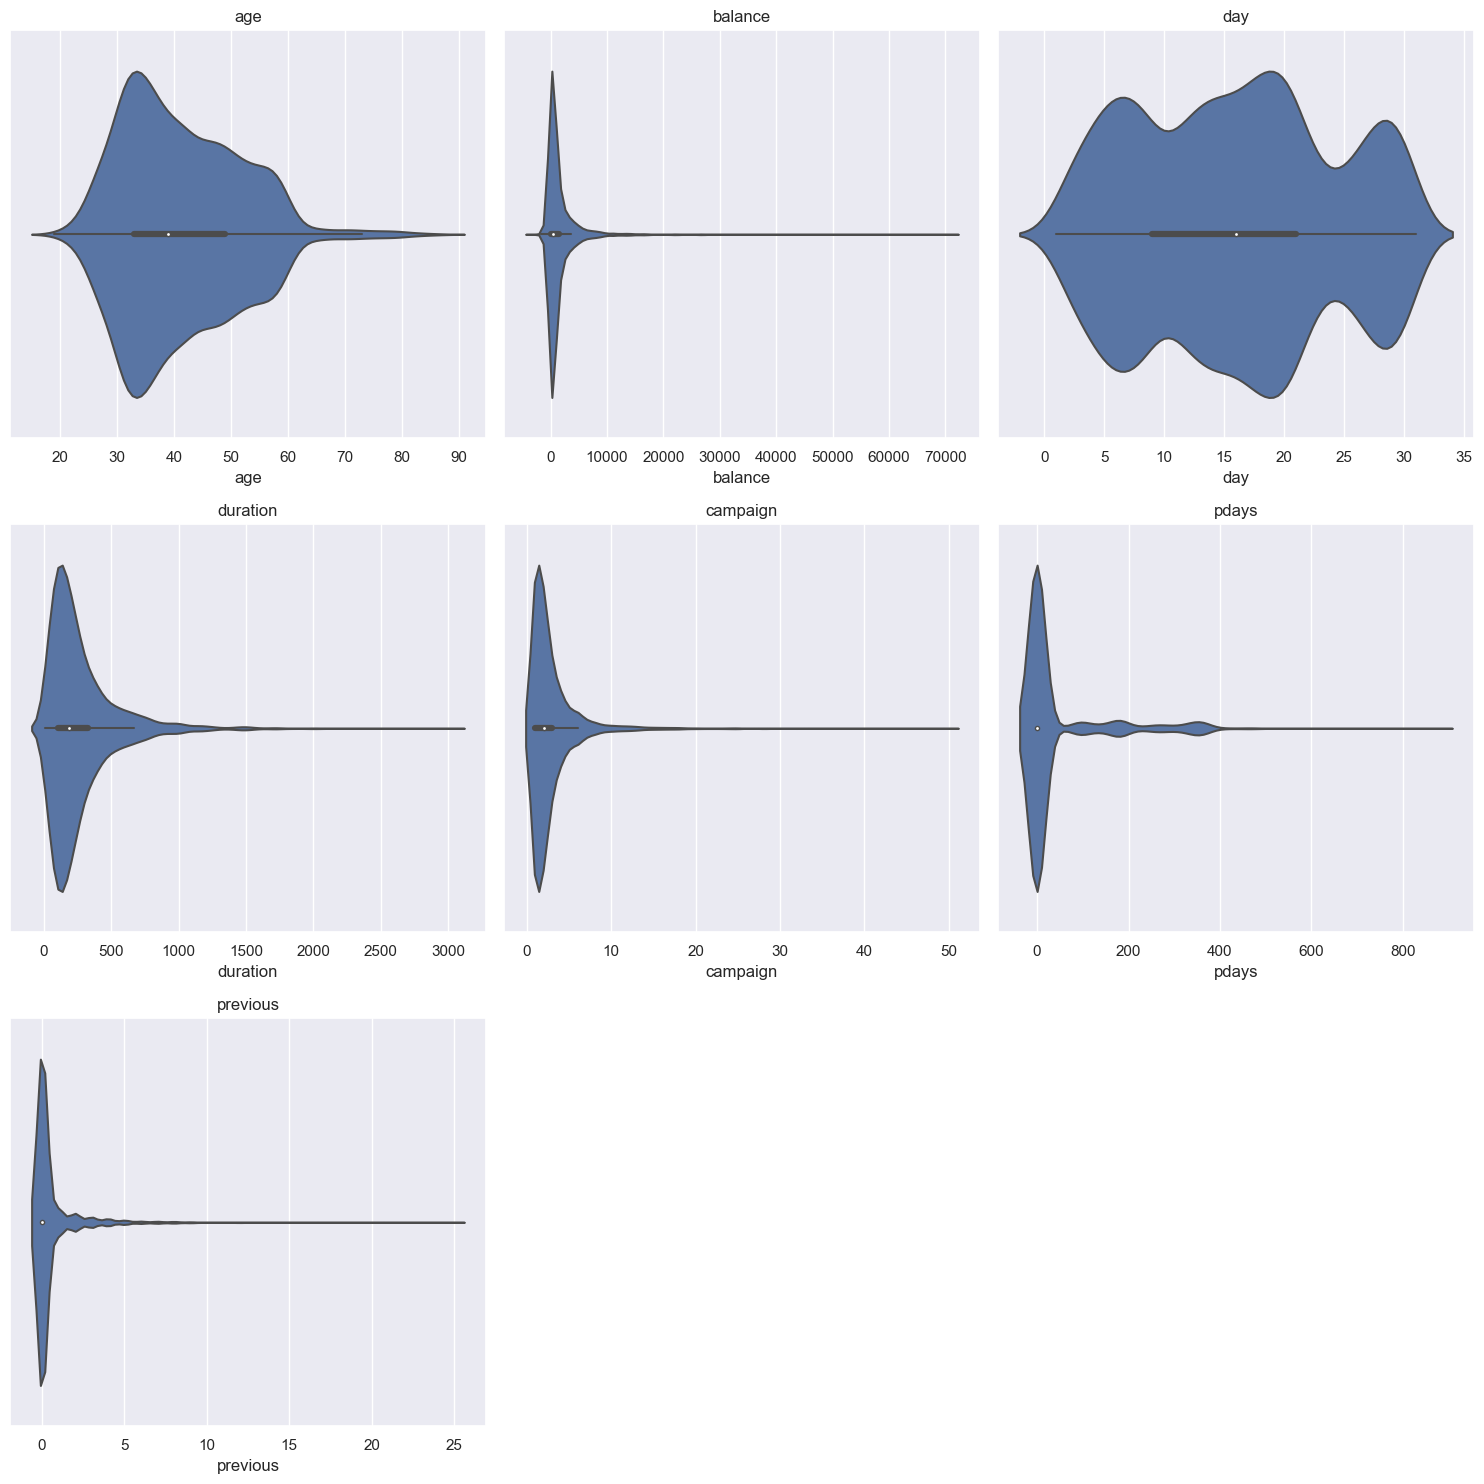

In [15]:
# visualization 5

# get all column names categorically - type int
int_vars = bank_df.select_dtypes(include='int').columns.tolist()

# create subplot figures
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# create countplot for each category
for i, var in enumerate(int_vars):
    sns.violinplot(x=bank_df[var], ax=axs[i])
    axs[i].set_title(var)
    
# remove any extra empty between subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# adjust spacing between subplots
fig.tight_layout()

plt.show()

In [16]:
# Preprocessing

# check missing values
missing = bank_df.isnull().sum() * 100/ bank_df.shape[0]
missing[missing>0].sort_values(ascending=False)

Series([], dtype: float64)